## Dataset Information

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels

(1 = dog, 0 = cat).

## Download Dataset

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip


--2022-08-29 12:57:39--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.194.105.142, 2600:1407:3c00:10a1::317f, 2600:1407:3c00:108a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.194.105.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   186MB/s    in 4.4s    

2022-08-29 12:57:44 (179 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



## Unzip the Dataset

In [2]:
 !unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

## Import Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

##Create Dataframe for Input and Output

In [4]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/7927.jpg 1


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Cat/3538.jpg      0
1  PetImages/Cat/3617.jpg      0
2  PetImages/Cat/3629.jpg      0
3  PetImages/Dog/2272.jpg      1
4  PetImages/Dog/3312.jpg      1

In [6]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [7]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

##delete db files

In [8]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

## Exploratory Data Analysis

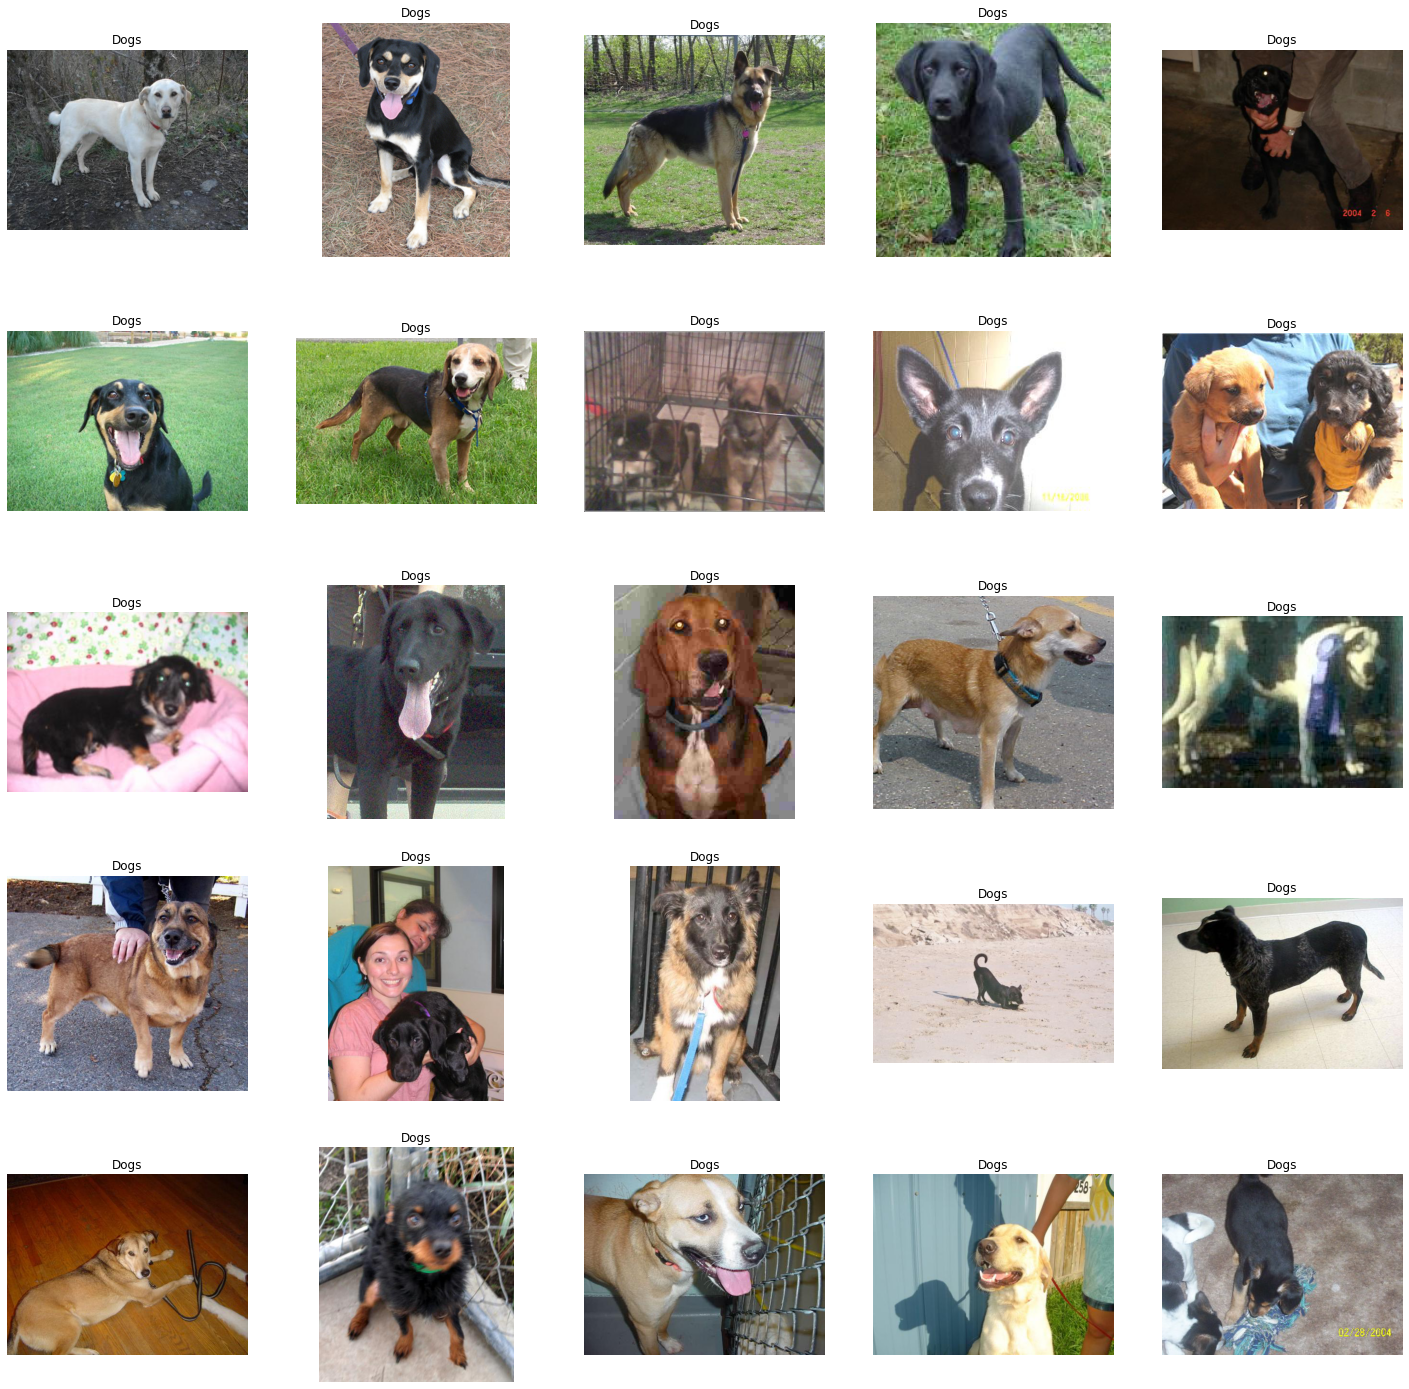

In [9]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

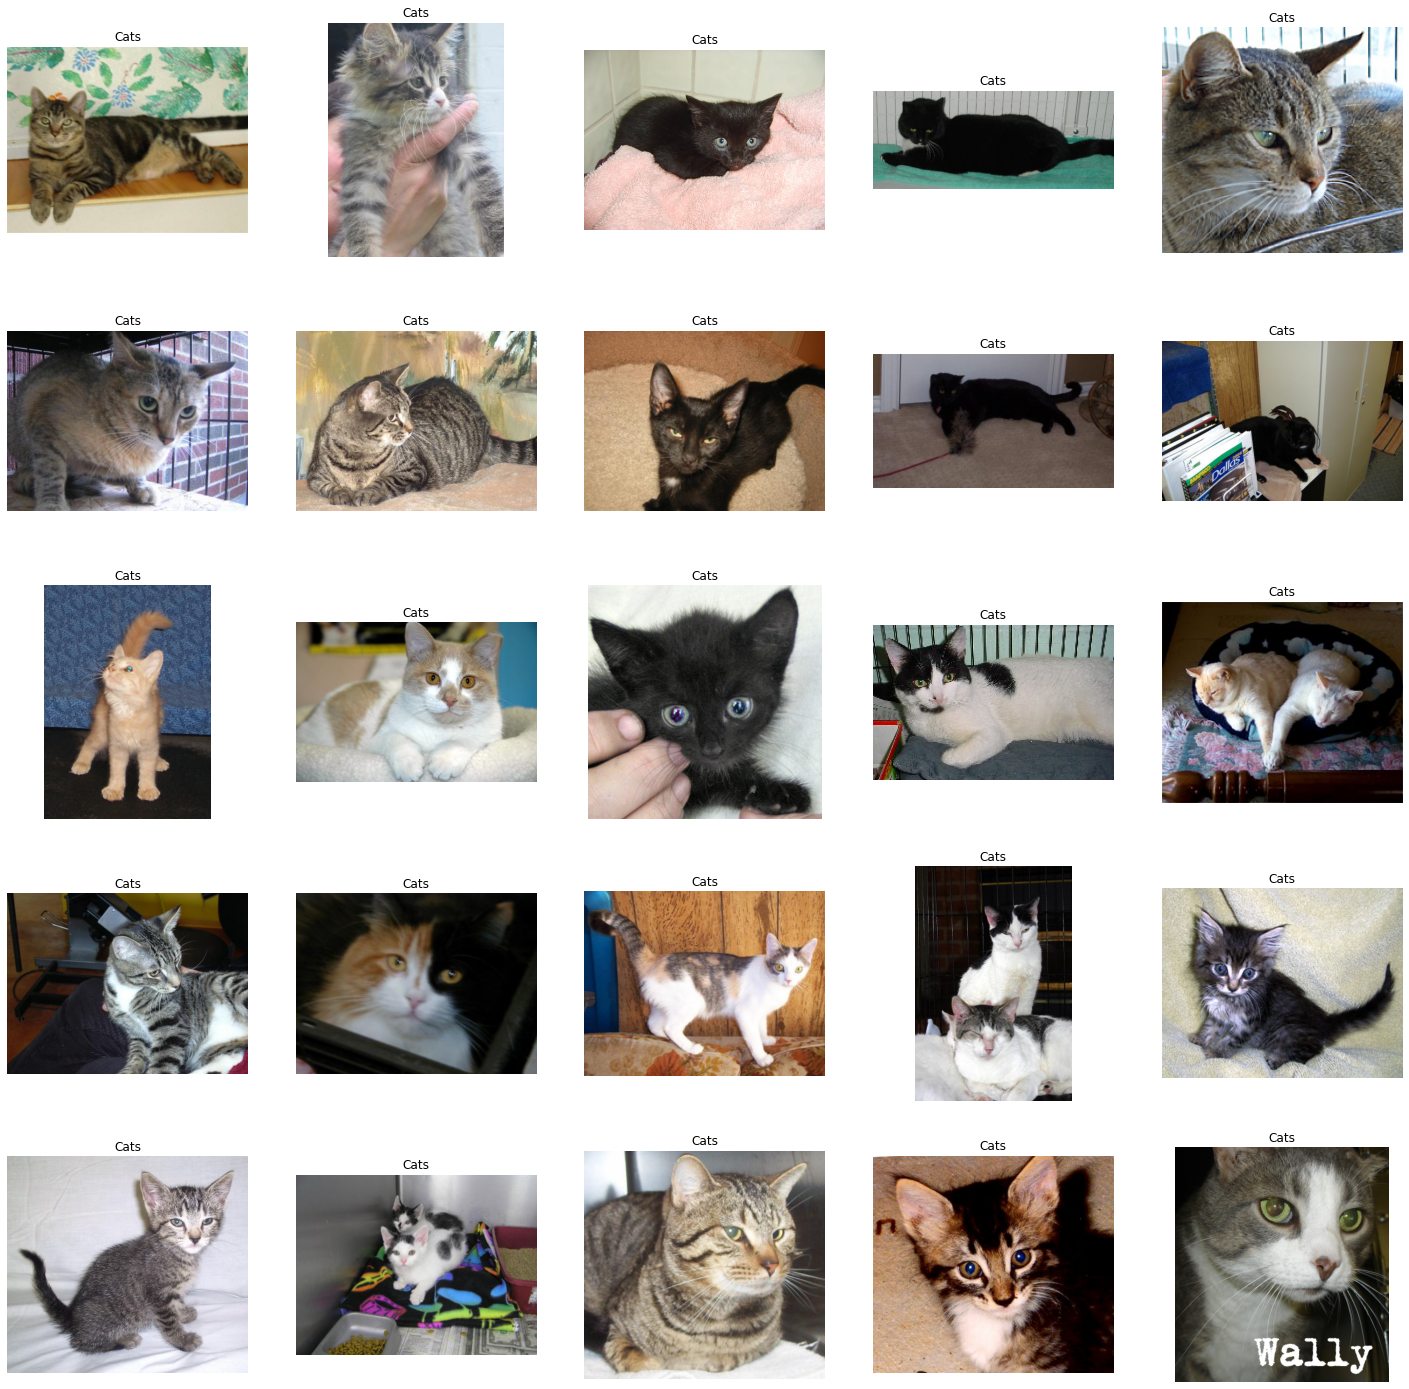

In [10]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

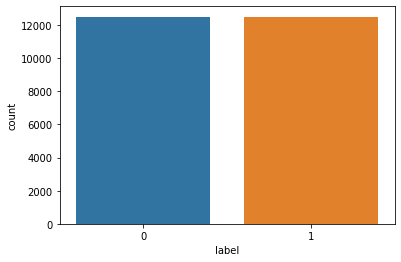

In [11]:
import seaborn as sns
sns.countplot(df['label'])

##Create DataGenerator for the Images

In [12]:
df['label'] = df['label'].astype('str')

In [13]:
df.head()

images label
0  PetImages/Cat/3538.jpg     0
1  PetImages/Cat/3617.jpg     0
2  PetImages/Cat/3629.jpg     0
3  PetImages/Dog/2272.jpg     1
4  PetImages/Dog/3312.jpg     1

In [14]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


##Model Creation

In [16]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

##Goal for 99% accuracy

## epochs 6 to 55



In [21]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
40/40 [==============================] - 125s 3s/step - loss: 0.5032 - accuracy: 0.7535 - val_loss: 0.4786 - val_accuracy: 0.7714
Epoch 2/50
40/40 [==============================] - 123s 3s/step - loss: 0.4858 - accuracy: 0.7637 - val_loss: 0.4517 - val_accuracy: 0.7852
Epoch 3/50
40/40 [==============================] - 122s 3s/step - loss: 0.4807 - accuracy: 0.7698 - val_loss: 0.4514 - val_accuracy: 0.7910
Epoch 4/50
40/40 [==============================] - 123s 3s/step - loss: 0.4710 - accuracy: 0.7761 - val_loss: 0.4529 - val_accuracy: 0.7920
Epoch 5/50
40/40 [==============================] - 123s 3s/step - loss: 0.4563 - accuracy: 0.7815 - val_loss: 0.4449 - val_accuracy: 0.7990
Epoch 6/50
40/40 [==============================] - 123s 3s/step - loss: 0.4425 - accuracy: 0.7881 - val_loss: 0.4092 - val_accuracy: 0.8142
Epoch 7/50
40/40 [==============================] - 123s 3s/step - loss: 0.4321 - accuracy: 0.7992 - val_loss: 0.4147 - val_accuracy: 0.8148
Epoch 8/50
40

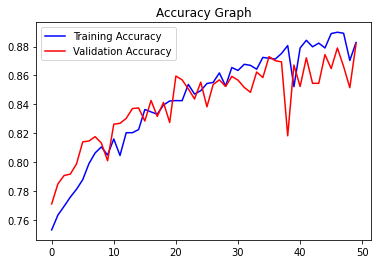

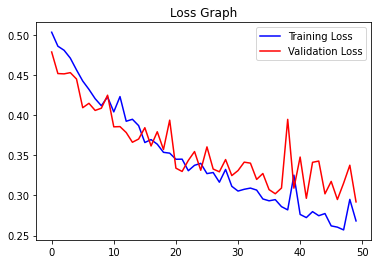

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [30]:
from keras.models import load_model

model.save('model_cat_dog_aug.h5') 

Minimum validation loss: 0.2919560670852661


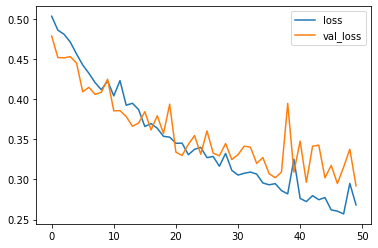

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


Maximum validation accuracy :   0.8818

##Fail to gain 99%

##Lets  try with  where epochs= 56 to 106
##before finished at 55

In [34]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
40/40 [==============================] - 125s 3s/step - loss: 0.2446 - accuracy: 0.8951 - val_loss: 0.2845 - val_accuracy: 0.8884
Epoch 2/50
40/40 [==============================] - 125s 3s/step - loss: 0.2591 - accuracy: 0.8912 - val_loss: 0.2917 - val_accuracy: 0.8820
Epoch 3/50
40/40 [==============================] - 123s 3s/step - loss: 0.2535 - accuracy: 0.8899 - val_loss: 0.3314 - val_accuracy: 0.8676
Epoch 4/50
40/40 [==============================] - 128s 3s/step - loss: 0.2468 - accuracy: 0.8967 - val_loss: 0.3512 - val_accuracy: 0.8616
Epoch 5/50
40/40 [==============================] - 128s 3s/step - loss: 0.2375 - accuracy: 0.8981 - val_loss: 0.2903 - val_accuracy: 0.8810
Epoch 6/50
40/40 [==============================] - 124s 3s/step - loss: 0.2288 - accuracy: 0.9014 - val_loss: 0.3107 - val_accuracy: 0.8766
Epoch 7/50
40/40 [==============================] - 123s 3s/step - loss: 0.2430 - accuracy: 0.8957 - val_loss: 0.3369 - val_accuracy: 0.8572
Epoch 8/50
40

 To train  model total time ***123 s * 106 = 217.3 min ***.. If you have much please time try 




# Final Result  :

In [39]:
history_df = pd.DataFrame(history.history)

print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.26246508955955505


In [44]:
print("Maximum validation accuracy : {}".format(history_df['val_accuracy'].max()))

Maximum validation accuracy : 0.901199996471405


In [41]:
print("Maximum accuracy : {}".format(history_df['accuracy'].max()))

Maximum accuracy : 0.9372937083244324


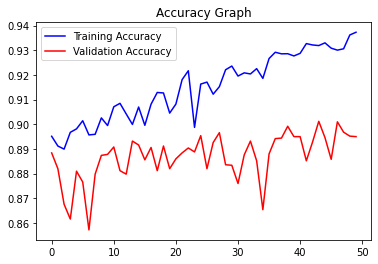

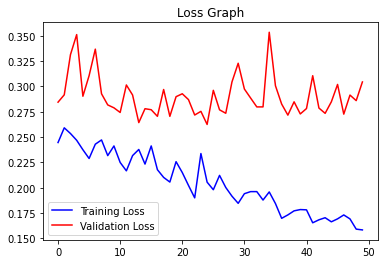

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()